# Changing $p(x)$

The simplest case we consider is a linear trend in where we are sampling the data over time. For this, we have to make a slight change to how we generate the data since previously we were sampling $p(x|y)$ from Gaussian distributions, but now we will sample $p(x)$ independently, and then sample $p(y|x)$.

Perhaps generating x then p(y|x) does not make sense since our data is then no longer

In [15]:
import copy
import importlib
import numpy as np
import pandas as pd
import os
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import importlib

import src.models.sklearn
import src.scripts.changing_p_x
import src.utils.data
import src.utils.metrics
import src.utils.update
import src.utils.save

importlib.reload(src.models.sklearn)
importlib.reload(src.scripts.changing_p_x)
importlib.reload(src.utils.data)
importlib.reload(src.utils.metrics)
importlib.reload(src.utils.update)
importlib.reload(src.utils.save)

from src.models.sklearn import lr, linear_svm
from src.scripts.changing_p_x import train_update_loop, results_to_dataframe, plot
from src.utils.data import make_trend_gaussian_data
from src.utils.metrics import eval_model
from src.utils.update import update_model_feedback, update_model_feedback_linear_trend
from src.utils.save import save_json, CONFIG_FILE

from dotenv import find_dotenv, load_dotenv
from settings import ROOT_DIR

%matplotlib inline

## Linear Trend

In [2]:
m0 = -1
m1 = 1

s0 = 1
s1 = 1

n_train = 10000
n_update = 10000
n_test = 50000
num_features = 1
uniform_range = [-5, 5]
seeds = 10
num_updates = 100
data_type = "gaussian"

### Positive

In [3]:
offset = 3.0

In [5]:
results_positive = train_update_loop(n_train, n_update, n_test, num_updates, m0, m1, s0, s1, num_features, uniform_range, offset, seeds)

0
1
2
3
4
5
6
7
8
9


In [6]:
data_positive = results_to_dataframe(results_positive, "pos")

In [7]:
sns.set_style('white')

### Negative

In [8]:
offset = -3.0

In [9]:
results_negative = train_update_loop(n_train, n_update, n_test, num_updates, m0, m1, s0, s1, num_features, uniform_range, offset, seeds)

0
1
2
3
4
5
6
7
8
9


In [10]:
data_negative = results_to_dataframe(results_negative, "neg")

In [11]:
data = pd.concat([data_positive, data_negative])

In [12]:
labels = ["Updated Model\nwith $P_{\mathrm{update}}(x)$ \nTested on $Q^{\mathrm{pos}}_{\mathrm{test}}(x)$"] + ["Updated Model\nwith $Q^{\mathrm{pos}}_{\mathrm{update}}(x)$ \nTested on $Q^{\mathrm{pos}}_{\mathrm{test}}(x)$"] + ["Updated Model\nwith $P_{\mathrm{update}}(x)$ \nTested on $Q^{\mathrm{neg}}_{\mathrm{test}}(x)$"] + ["Updated Model\nwith $Q^{\mathrm{neg}}_{\mathrm{update}}(x)$ \nTested on $Q^{\mathrm{neg}}_{\mathrm{test}}(x)$"]

In [13]:
config = {"m0": m0, "m1": m1, "s0": s0, "s1": s1, "n_train": n_train, "n_update": n_update, "n_test": n_test, "num_updates": num_updates, "num_features": num_features,
         "range_min": uniform_range[0], "range_max": uniform_range[1], "data_type": data_type}

In [17]:
load_dotenv(find_dotenv(), override=True)
results_dir = os.environ.get("CHANGING_P_X_RESULTS_DIR")
results_dir = os.path.join(ROOT_DIR, results_dir)

In [18]:
plot_name = "linear_trend"
plot_file_name = "{}".format(plot_name)
plot_path = os.path.join(results_dir, plot_file_name)

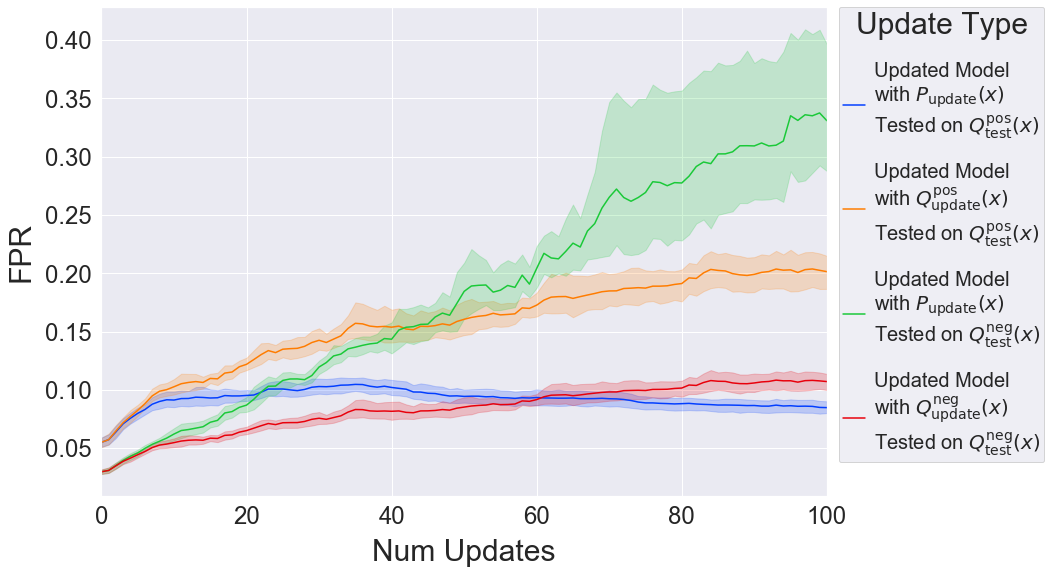

In [19]:
plot(data, labels, num_updates, plot_path)

In [20]:
config_file_name = CONFIG_FILE.format(plot_name, "")
config_path = os.path.join(results_dir, config_file_name)
save_json(config, config_path)